# VAE - Variational Auto Encoder
### Variational auto encoder Encoder maps X onto a latent space Z Decoder samples Z from N(0,1) VAE_loss = Reconstruction_loss + KL_loss
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.vae

### Arguments that work with VAE algorithm:
1. encoder_neurons
2. oder_neurons
3. ent_dim
4. den_activation
5. output_activation
6. loss
7. optimizer
8. epochs
9. batch_size
10. dropout_rate
11. l2_regularizer
12. validation_size
13. preprocessing
14. verbose
15. random_state
16. contamination
17. gamma
18. capacity

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
histograms = O.Features.get_features(imgs, feature_type="hist", norm_type="minmax")

get2D                    ...took    46.637984 seconds


2022-09-01 21:40:23.777958: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-09-01 21:40:25.537322: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-09-01 21:40:25.642736: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-09-01 21:40:25.642792: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-09-01 21:40:25.646092: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-09-01 21:40:25.646140: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.1

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          65792       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          32896       dense[0][0]                      
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128)          0           dense_1[0][0]                    
______________________________________________________________________________________________

2022-09-01 21:40:25.656272: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-01 21:40:25.659074: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-09-01 21:40:25.664346: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2022-09-01 21:40:25.664422: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-09-01 21:40:26.191390: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecuto

Epoch 1/100


2022-09-01 21:40:28.016018: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


1/3 [=========>....................] - ETA: 3s - loss: 284.2644

2022-09-01 21:40:28.727704: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-09-01 21:40:28.728126: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


3/3 [==============================] - 2s 104ms/step - loss: 328.3341 - val_loss: 329.9718
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 326.1527 - val_loss: 326.0451
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 322.9646 - val_loss: 324.5175
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 316.8642 - val_loss: 323.9149
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 311.3280 - val_loss: 322.9594
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 312.2206 - val_loss: 317.3252
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 304.9082 - val_loss: 311.3720
Epoch 8/100
3/3 [==============================] - 0s 13ms/step - loss: 301.1322 - val_loss: 306.1400
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 300.7695 - val_loss: 296.2813
Epoch 10/100
3/3 [==============================] - 0s 13ms/step - loss: 290.1913 - val_loss:

3/3 [==============================] - 0s 15ms/step - loss: 256.2577 - val_loss: 258.2825
Epoch 81/100
3/3 [==============================] - 0s 16ms/step - loss: 258.7231 - val_loss: 252.2941
Epoch 82/100
3/3 [==============================] - 0s 16ms/step - loss: 254.8781 - val_loss: 249.8965
Epoch 83/100
3/3 [==============================] - 0s 15ms/step - loss: 260.2943 - val_loss: 248.8522
Epoch 84/100
3/3 [==============================] - 0s 14ms/step - loss: 257.6920 - val_loss: 257.3535
Epoch 85/100
3/3 [==============================] - 0s 14ms/step - loss: 253.5065 - val_loss: 253.9698
Epoch 86/100
3/3 [==============================] - 0s 26ms/step - loss: 249.8171 - val_loss: 243.5869
Epoch 87/100
3/3 [==============================] - 0s 15ms/step - loss: 253.1233 - val_loss: 250.6131
Epoch 88/100
3/3 [==============================] - 0s 16ms/step - loss: 261.7908 - val_loss: 250.0404
Epoch 89/100
3/3 [==============================] - 0s 15ms/step - loss: 252.4755 - va

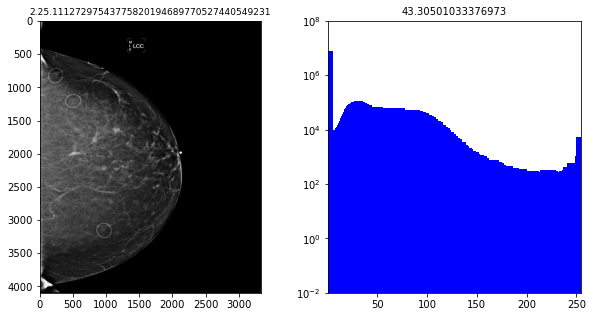

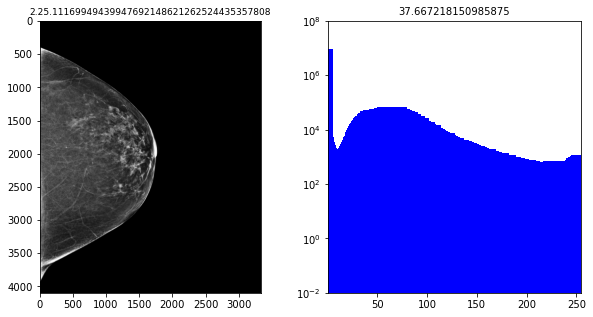

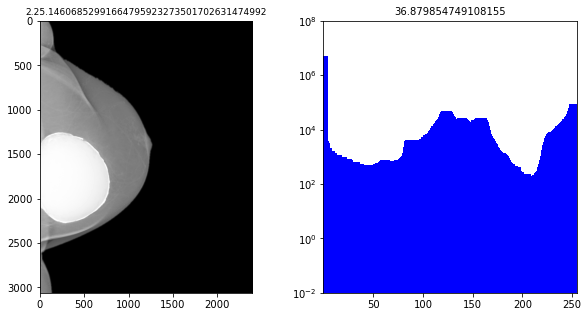

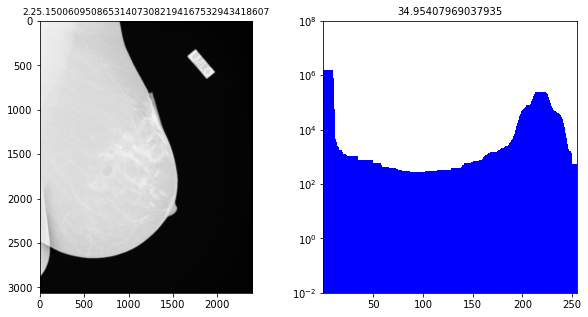

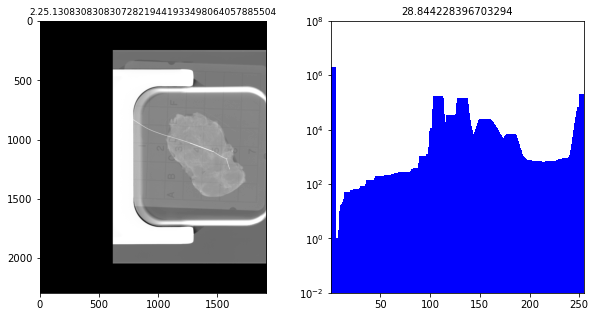

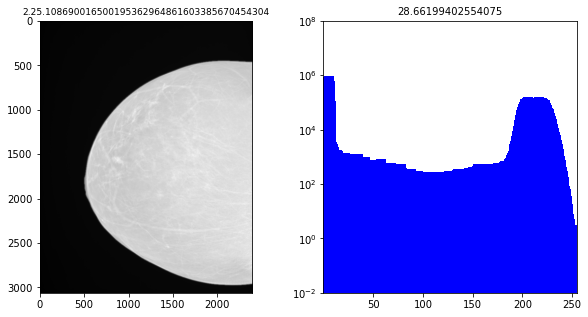

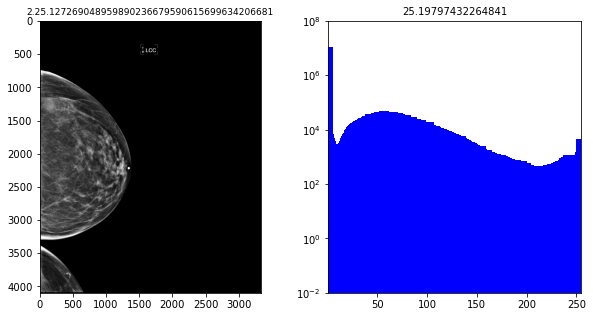

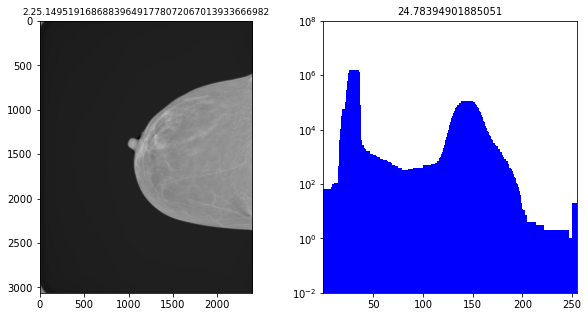

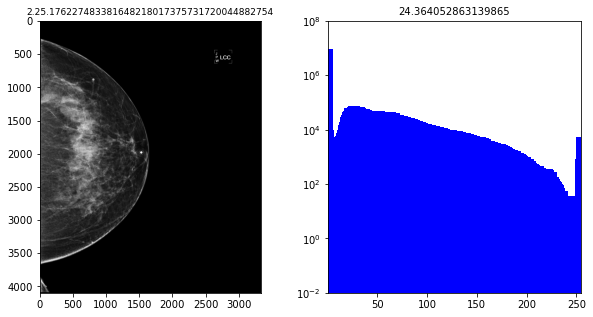

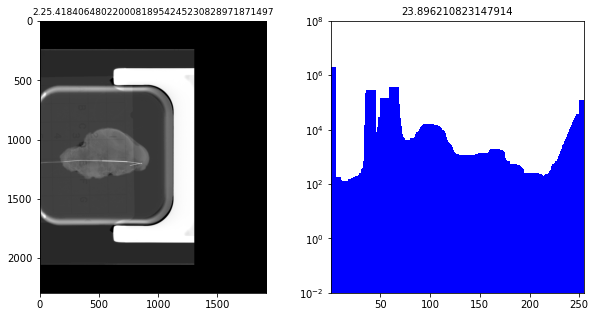

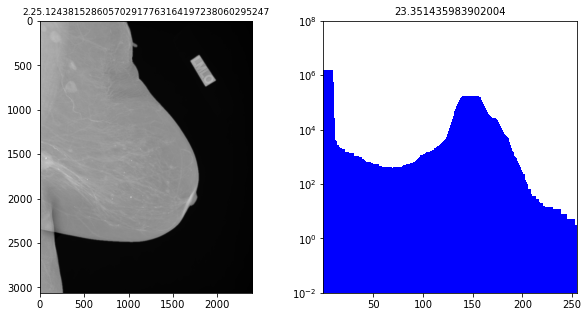

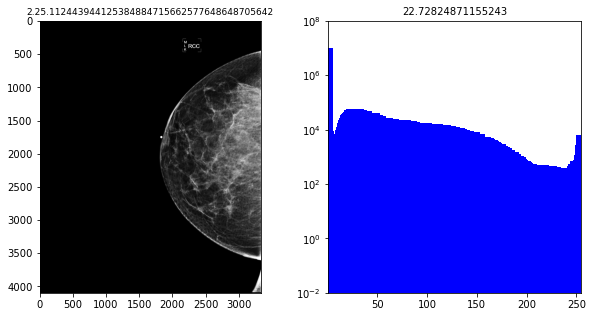

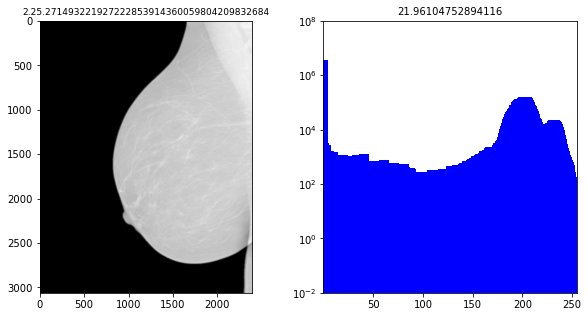

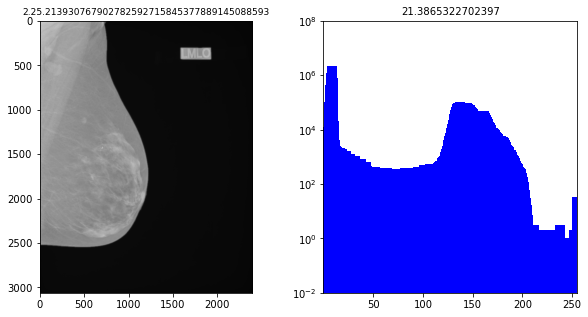

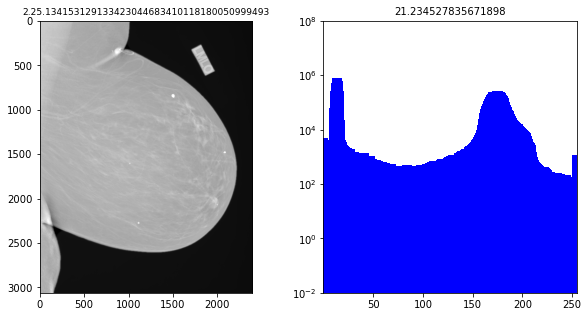

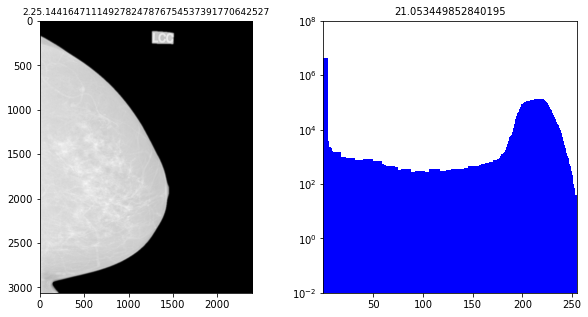

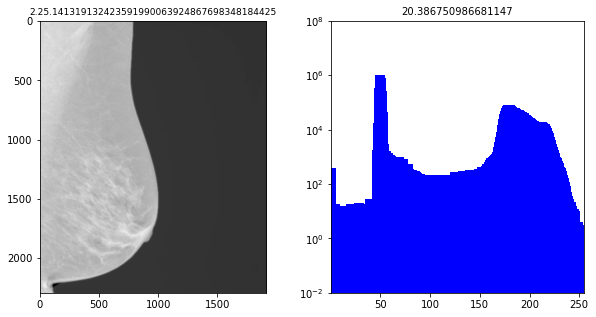

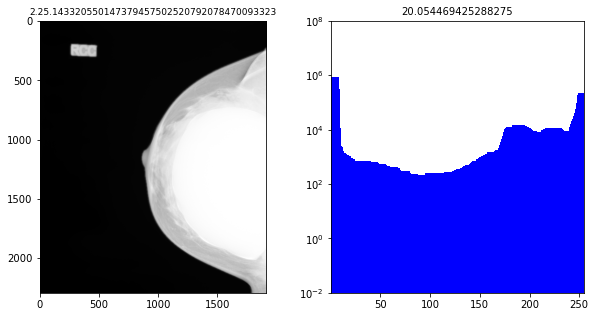

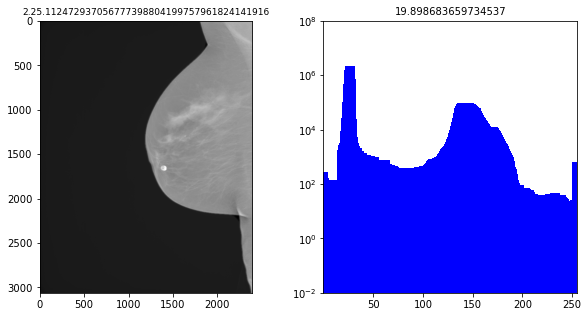

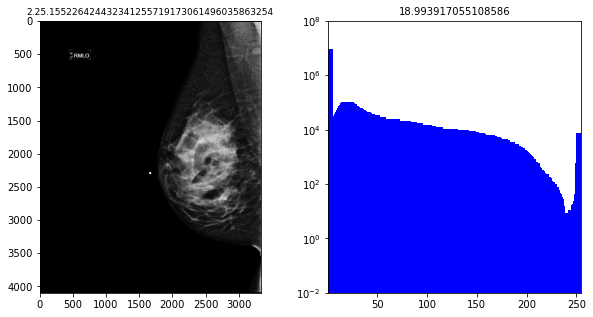

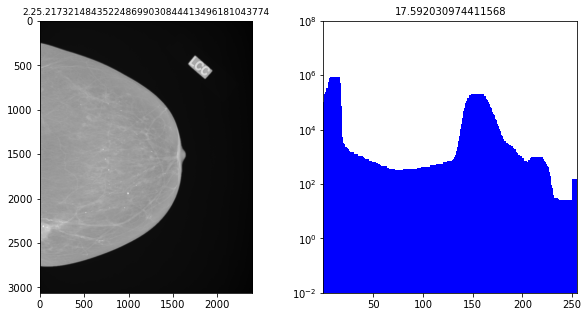

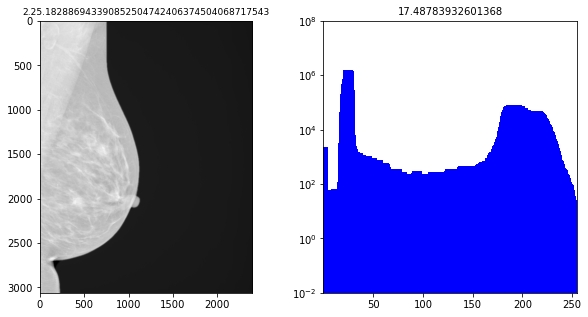

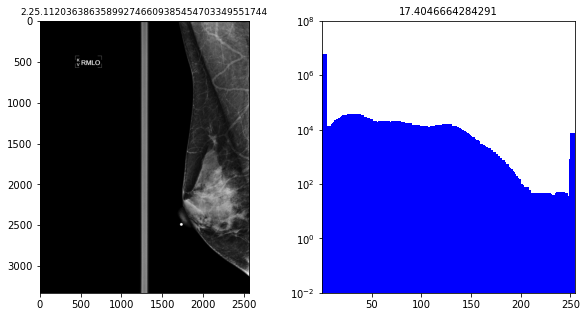

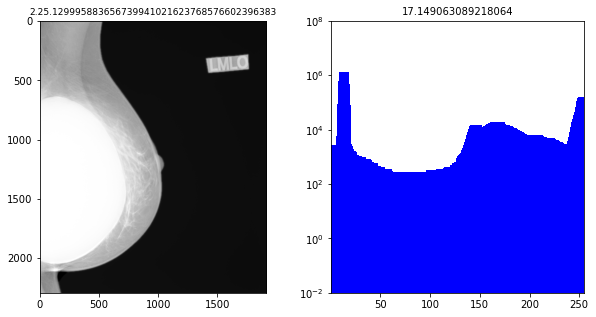

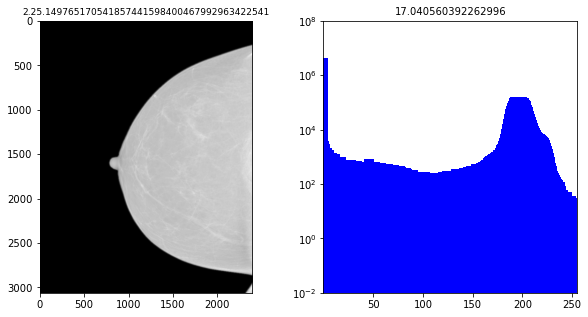

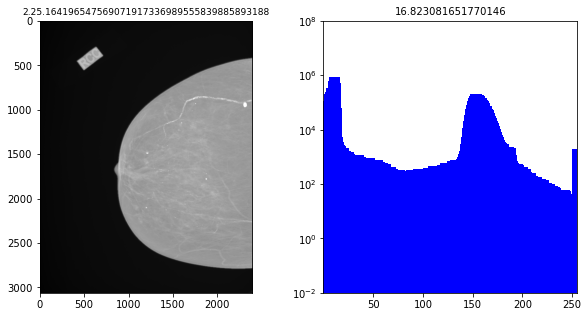

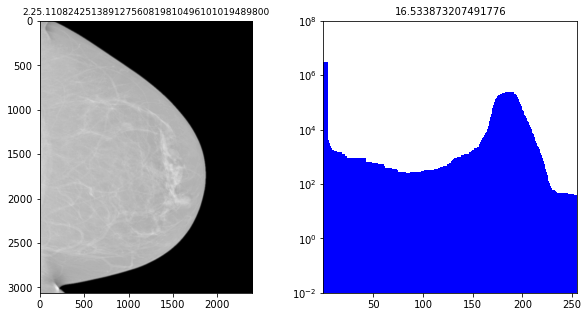

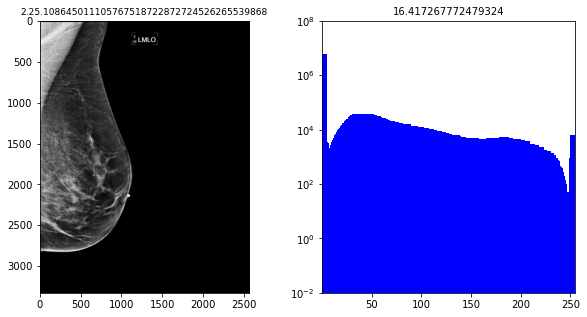

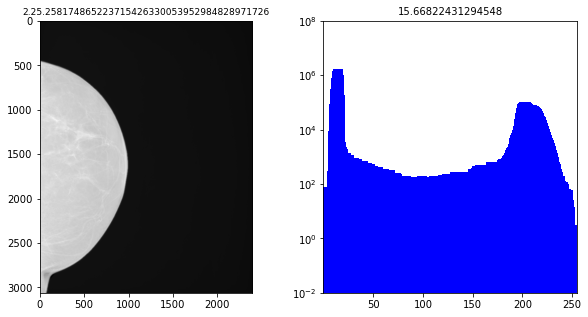

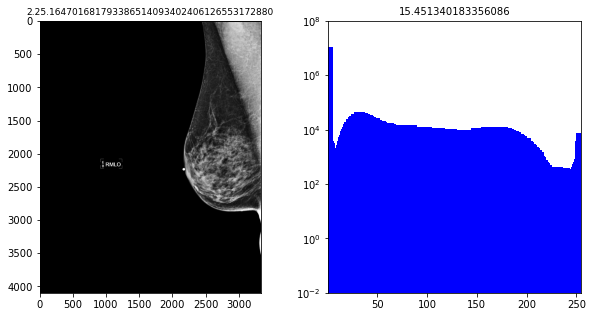

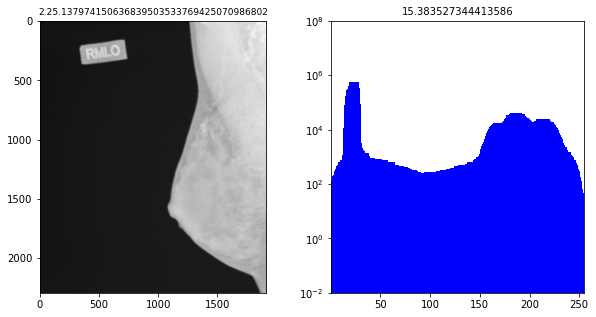

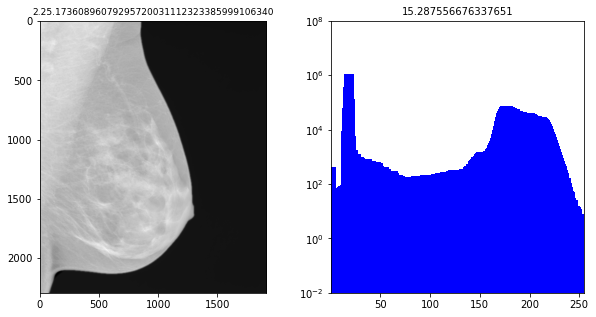

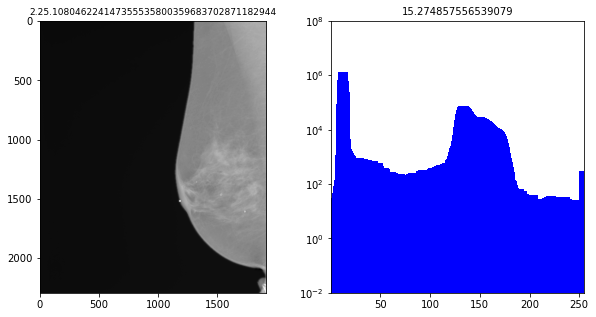

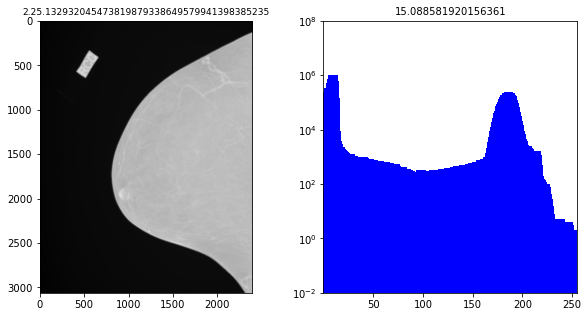

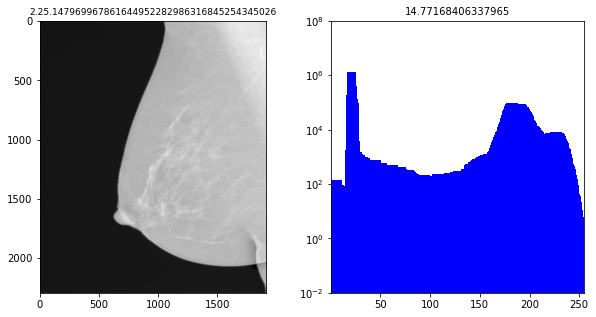

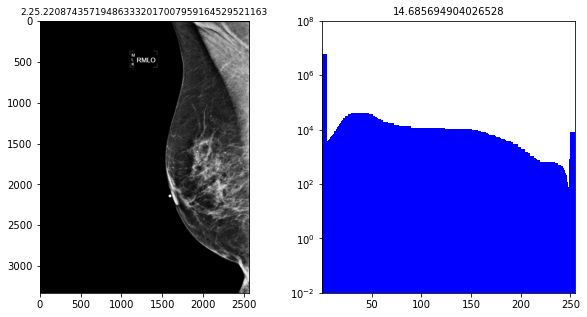

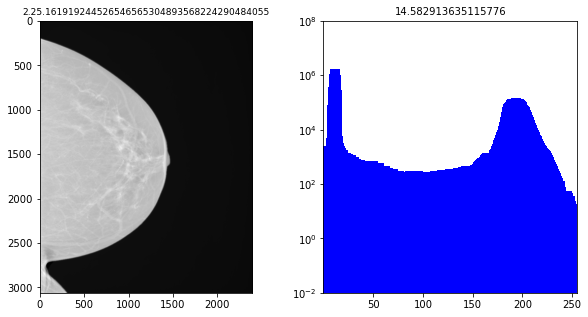

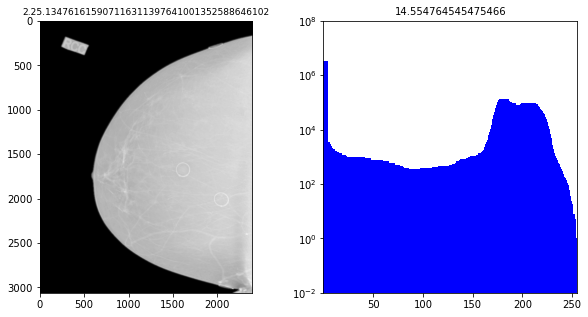

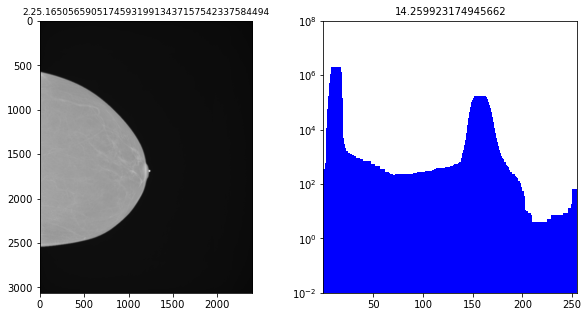

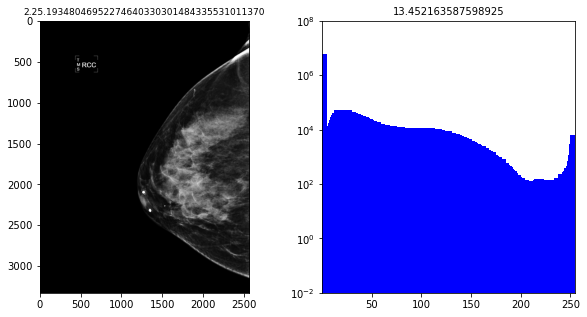

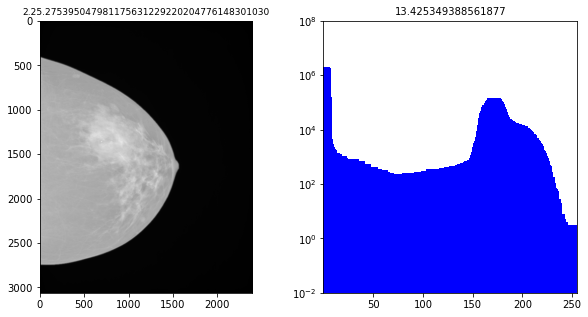

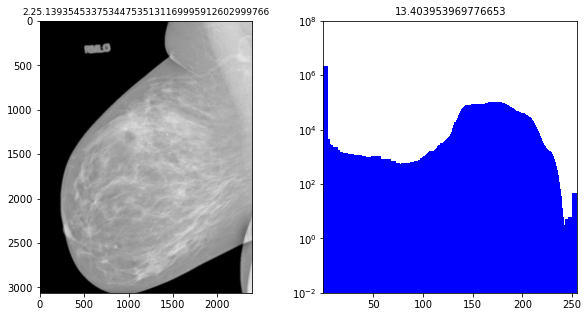

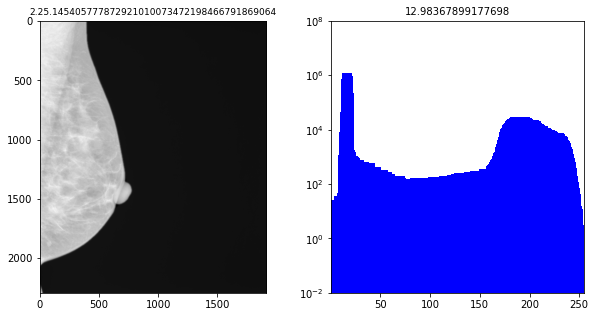

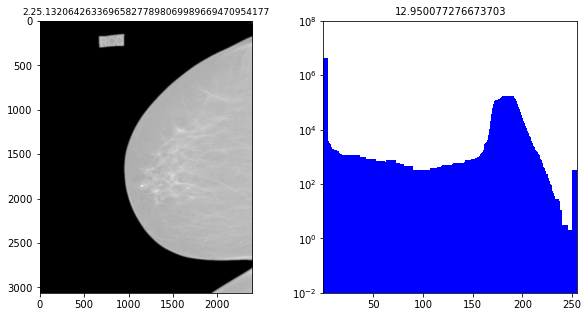

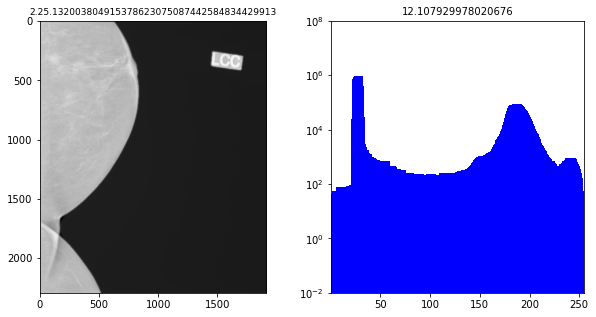

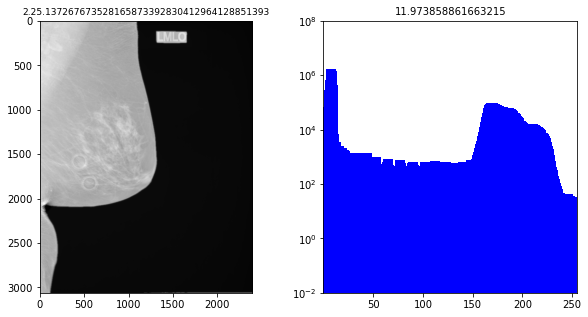

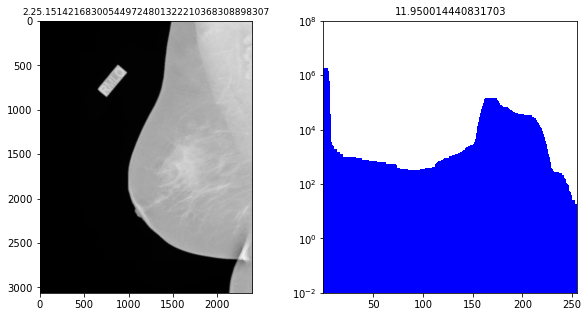

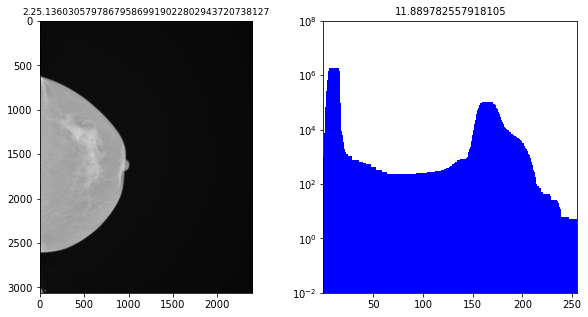

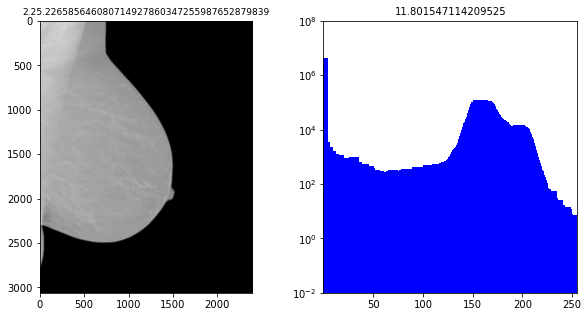

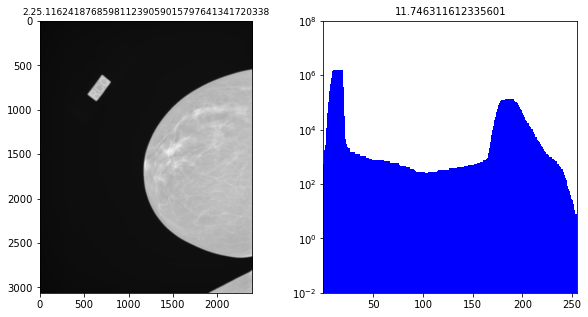

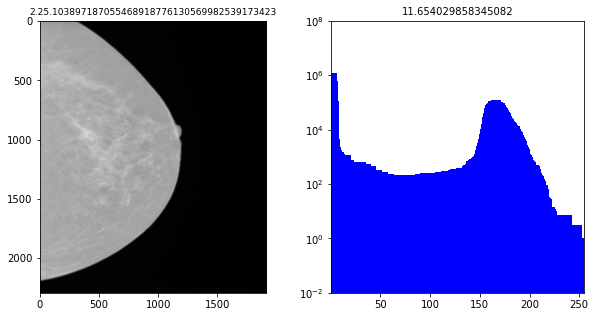

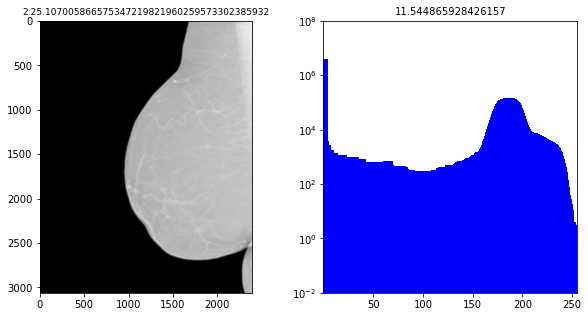

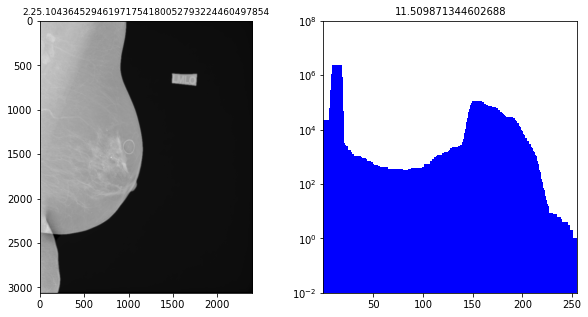

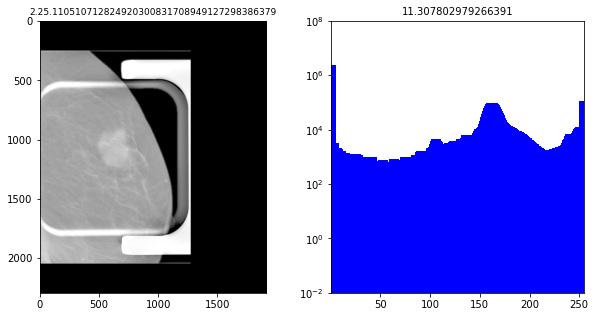

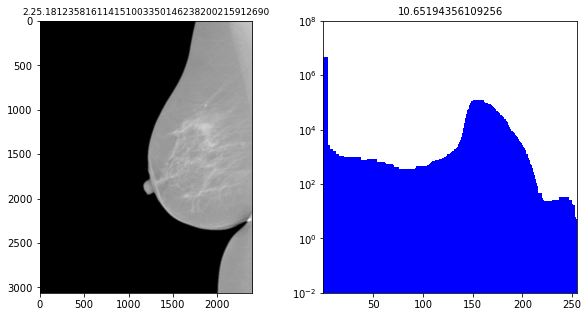

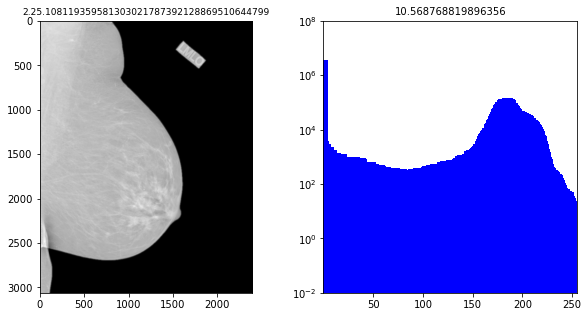

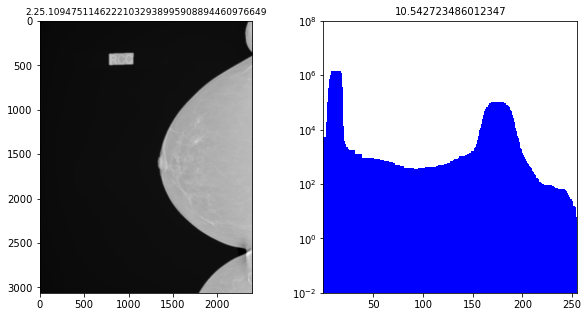

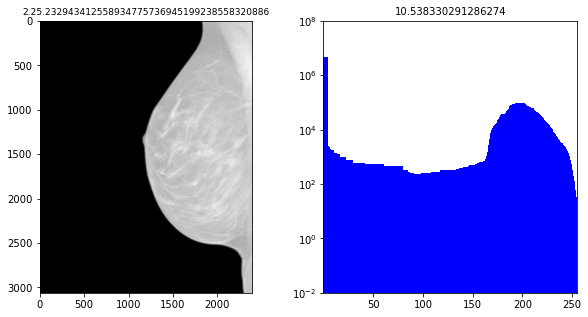

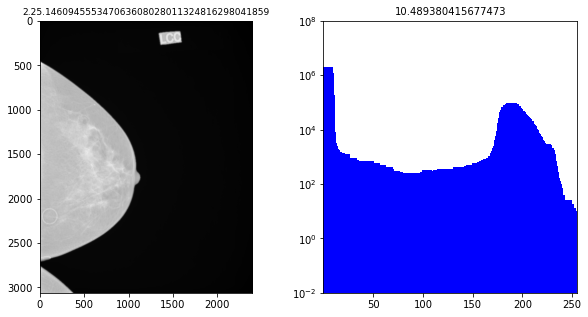

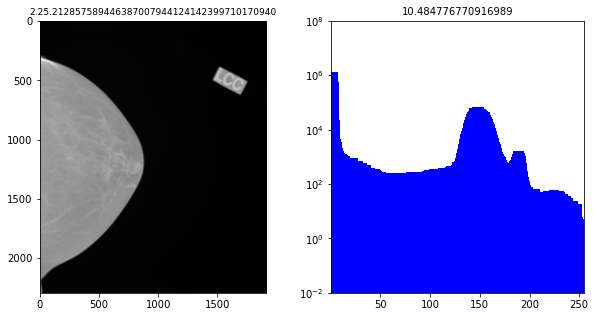

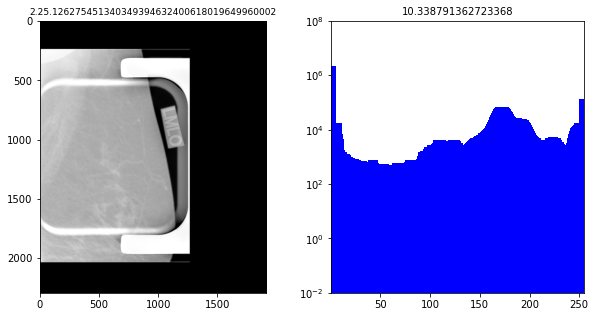

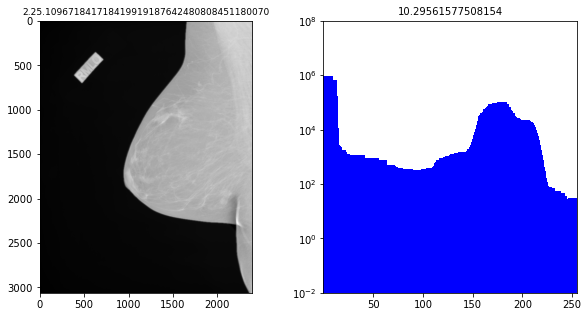

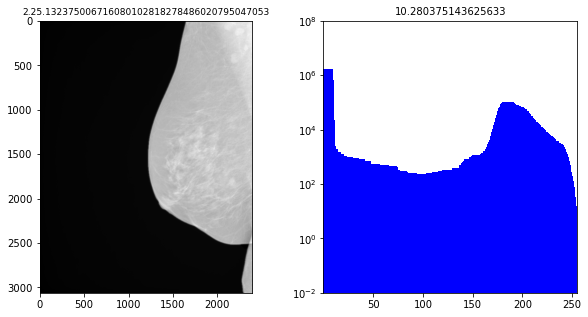

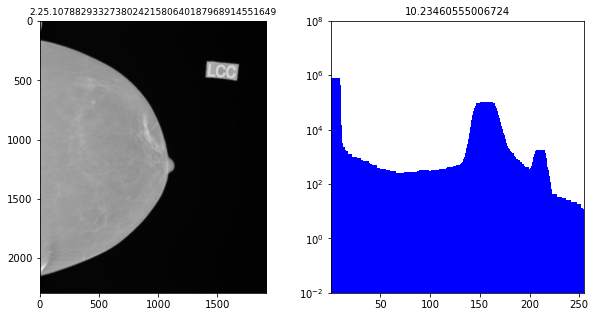

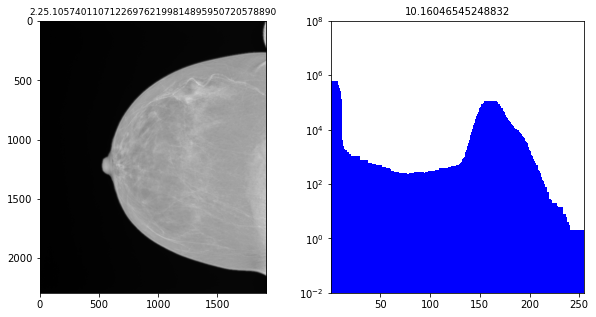

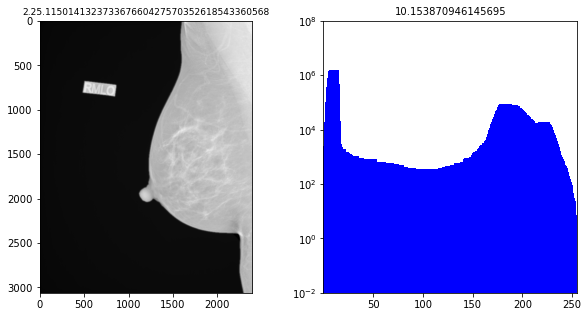

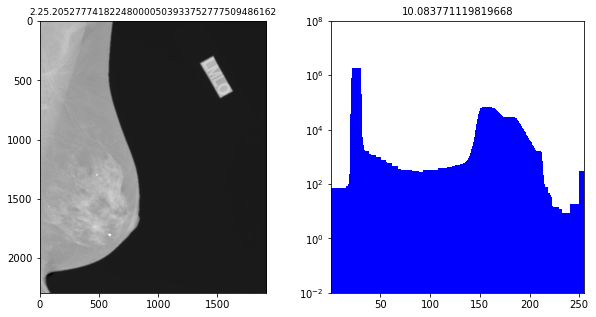

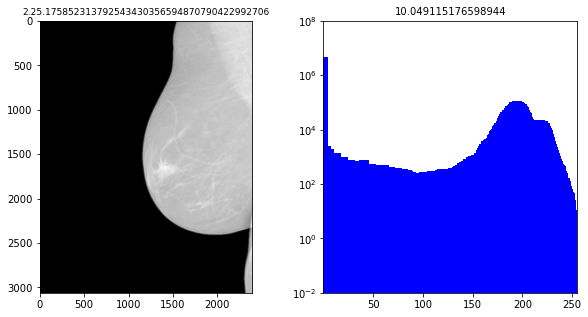

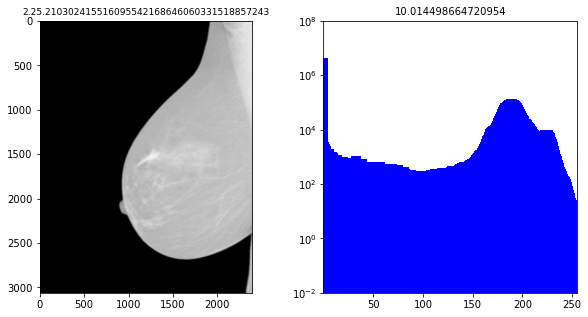

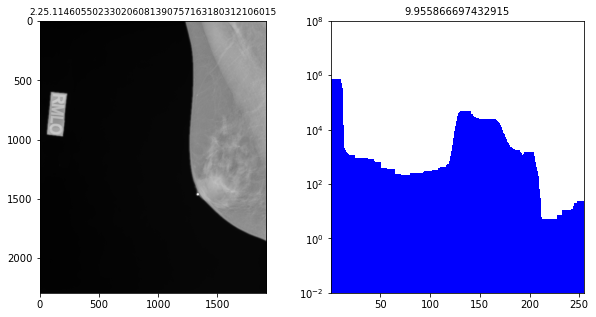

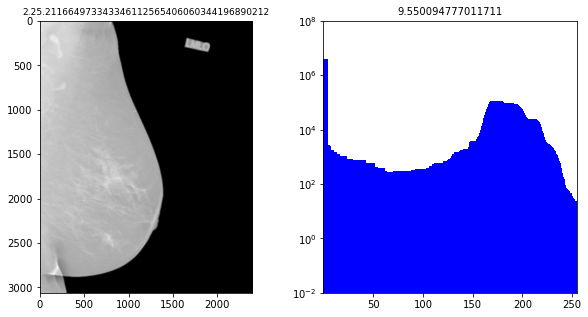

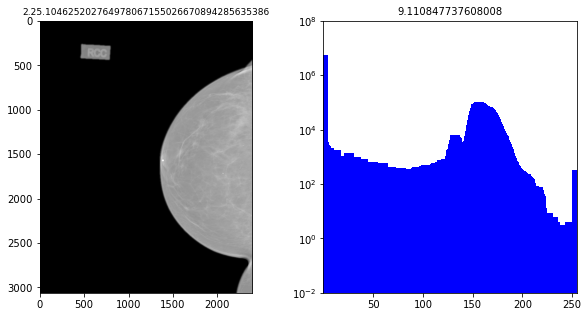

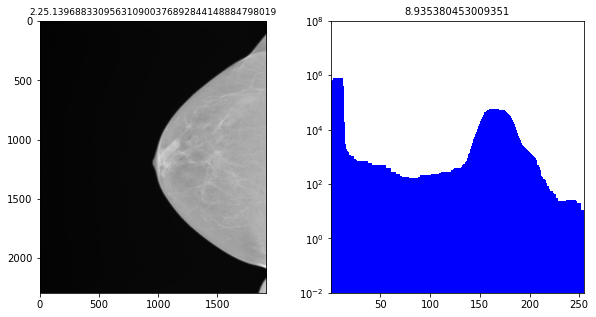

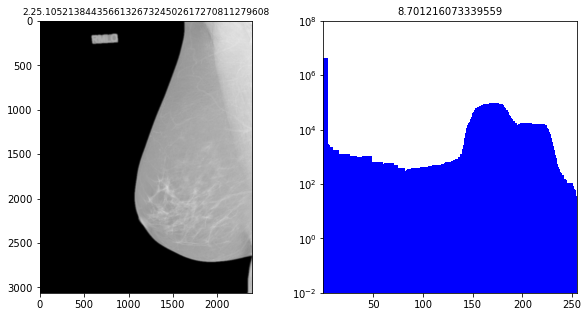

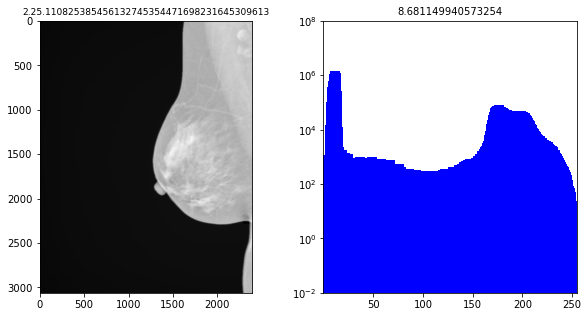

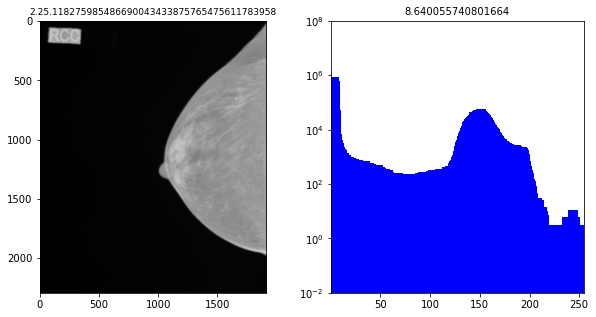

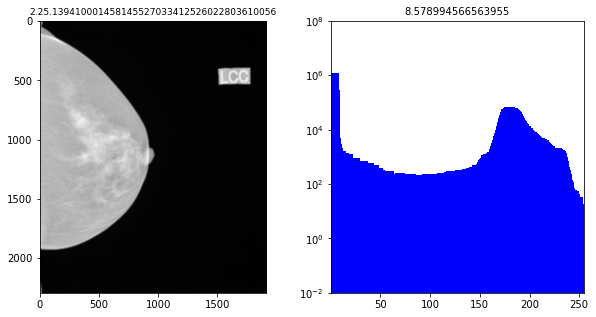

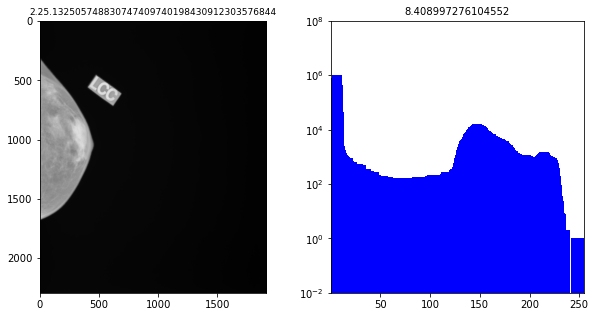

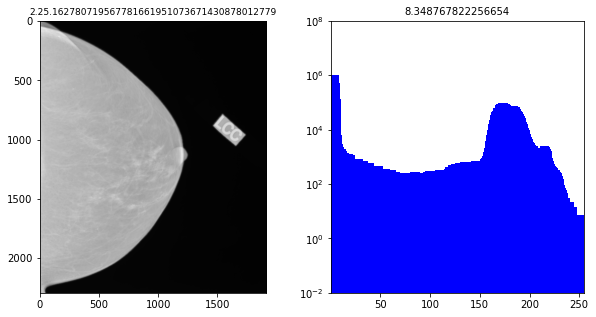

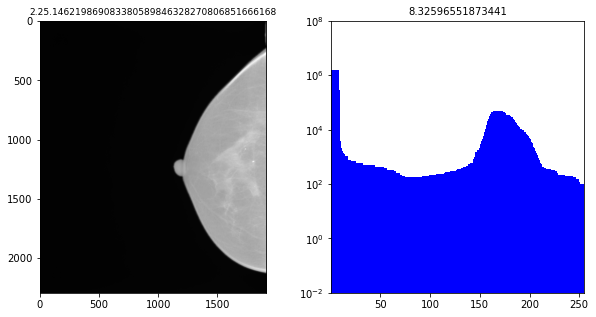

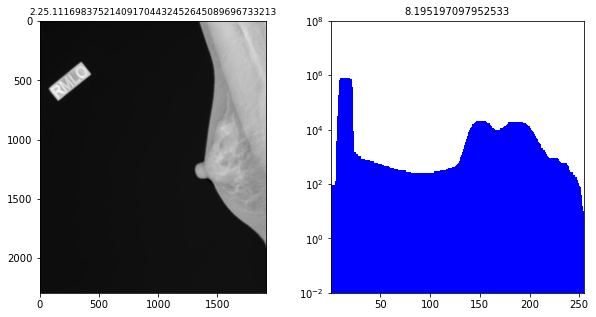

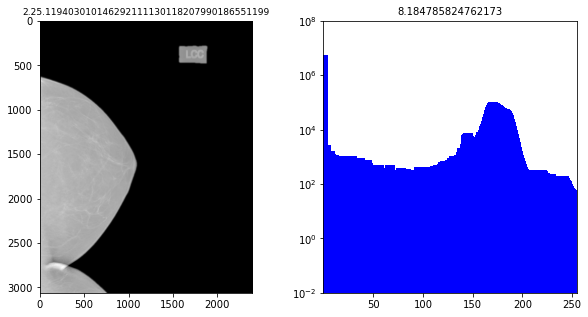

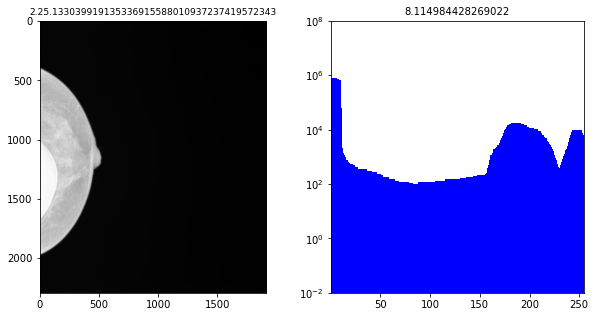

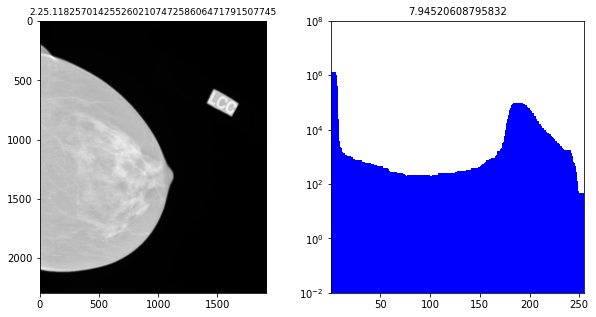

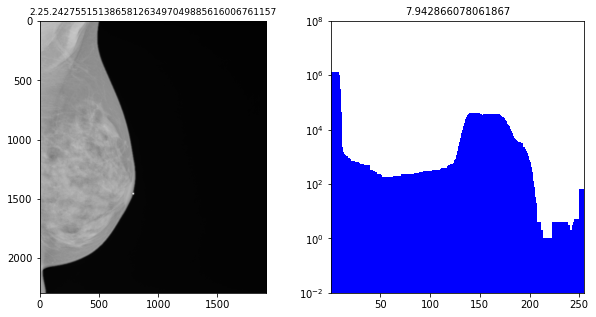

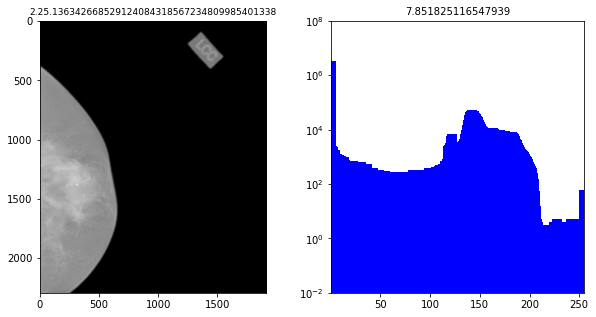

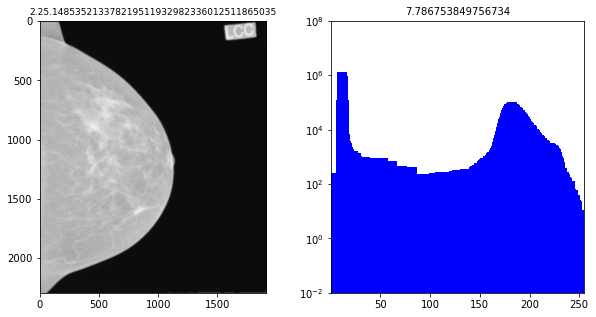

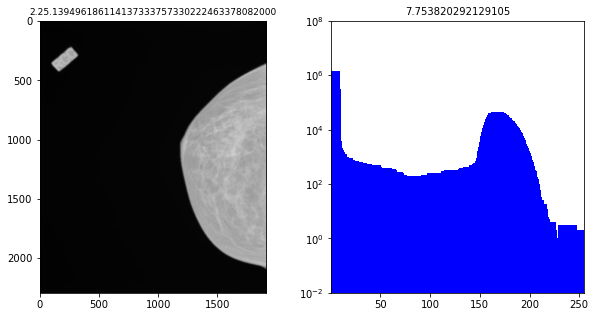

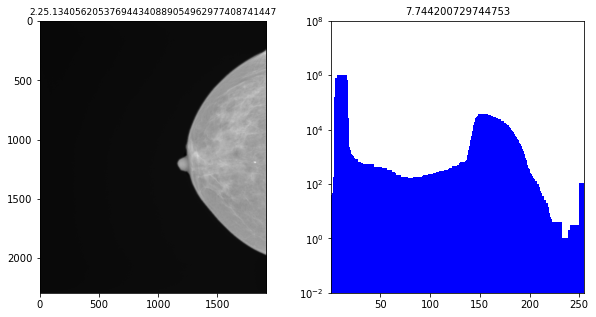

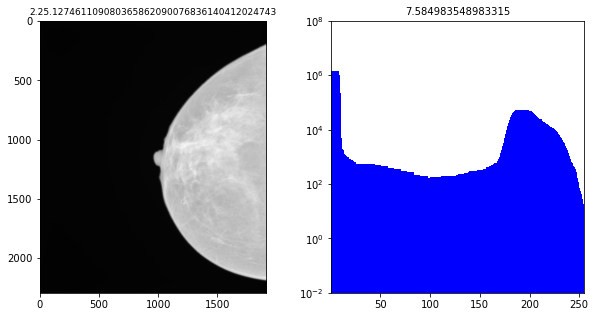

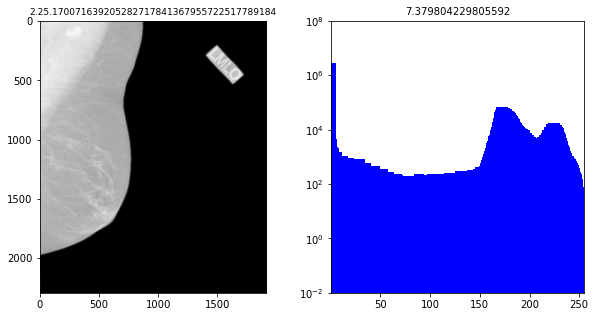

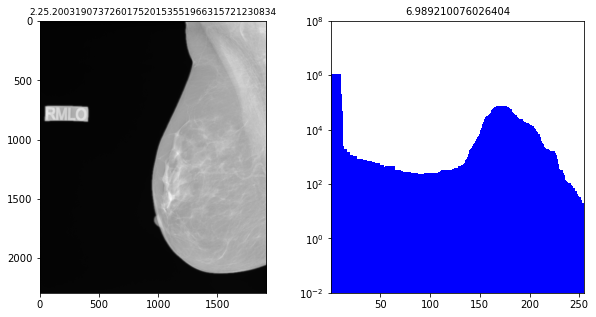

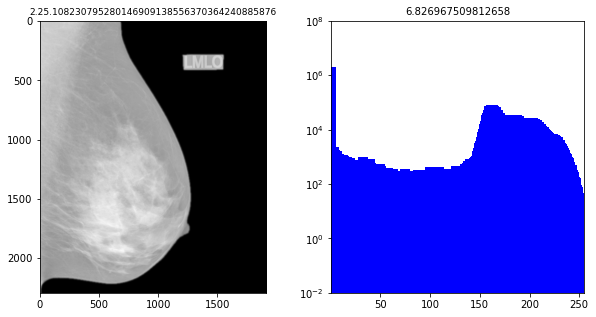

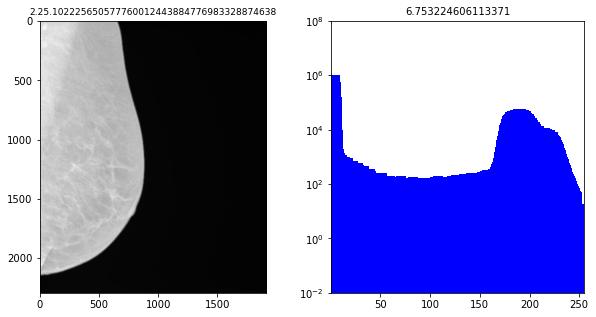

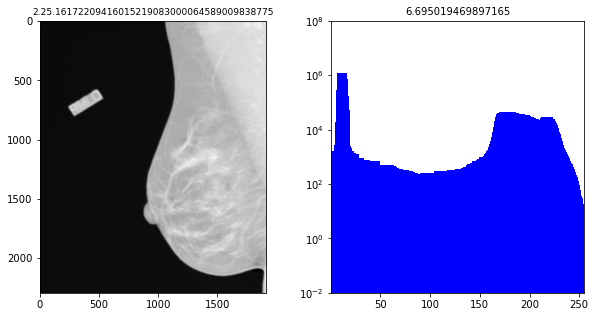

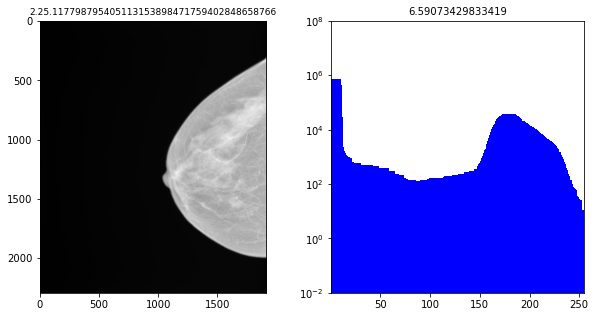

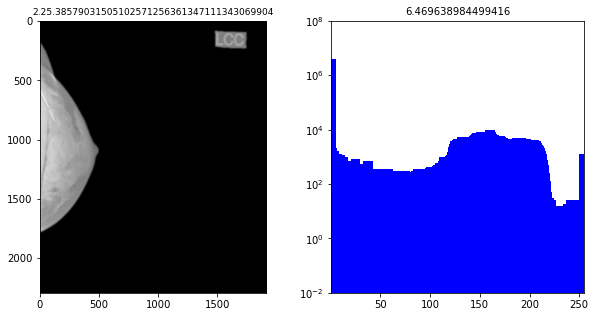

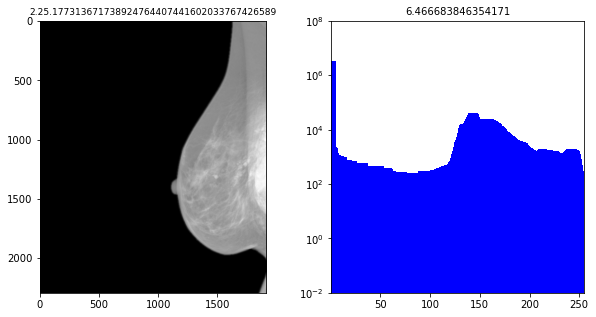

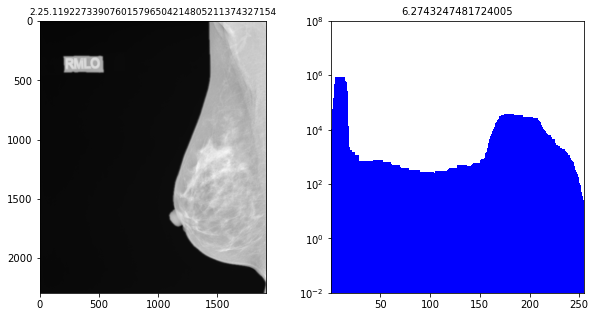

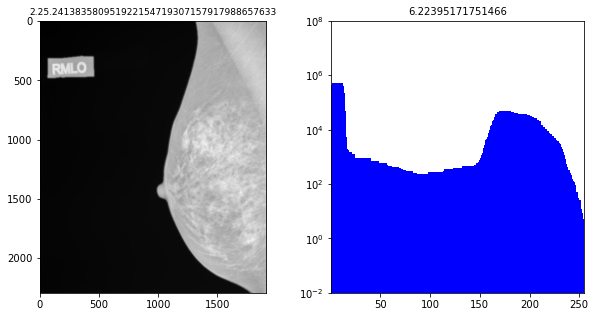

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(histograms, pyod_algorithm='VAE')
O.Features.view_image_and_features(imgs, ['hist'], train_scores=[train_scoresX])